### Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.tsa.stattools as sts

### Definindo as funções

In [2]:
# Verificar se a série possui normalidade
def testenormal(x):
    e,p=stats.shapiro(x)
    if p>=0.05:
        return "A serie é normal"
    else:
        return "A serie NÃO é normal"
    
# Verificar se a série é estacionária
def testeestacionaria(x):
    kpss=sts.kpss(x)
    teste=kpss[0]
    valorcritico=kpss[3]['5%']
    if teste>valorcritico:
        return "A serie NÃO é estacionaria"
    else:
        return "A serie é estacionaria"

### Questões - Exercicio 2

1. Carregue o arquivo "DENGUE_MBA_ST.csv". Faça o que se pede:

In [3]:
# Carregando o dataset
df=pd.read_csv('..\datasets\DENGUE_MBA_ST.csv')
df.head()

,ANO,SEMANA_DO_ANO,AEROLANDIA,AEROPORTO,ALDEOTA,ALTO DA BALANCA,ALVARO WEYNE,AMADEU FURTADO,ANCURI,ANTONIO BEZERRA,...,VICENTE PINZON,VILA ELLERY,VILA PERY,VILA UNIAO,VILA VELHA,ALAGADICO,GENTILANDIA,MATA GALINHA,PAN-AMERICANO,DATA
0,2011,1,0,0,1,0,0,0,3,0,...,1,0,1,0,2,0.0,0.0,0.0,0.0,2011-01-09
1,2011,2,0,0,0,0,1,0,1,0,...,1,1,5,1,4,0.0,0.0,0.0,0.0,2011-01-16
2,2011,3,0,0,2,1,1,0,7,1,...,6,0,6,4,2,0.0,0.0,0.0,0.0,2011-01-23
3,2011,4,0,0,0,0,2,0,2,0,...,6,2,8,1,0,0.0,0.0,0.0,0.0,2011-01-30
4,2011,5,0,0,0,1,4,0,2,0,...,6,2,2,5,1,0.0,0.0,0.0,0.0,2011-02-06


In [4]:
### Ajustadndo dataframe
# Convertendo a coluna 'DATA' para o tipo datetime
df['DATA']=pd.to_datetime(df['DATA'])

In [5]:
df

,ANO,SEMANA_DO_ANO,AEROLANDIA,AEROPORTO,ALDEOTA,ALTO DA BALANCA,ALVARO WEYNE,AMADEU FURTADO,ANCURI,ANTONIO BEZERRA,...,VICENTE PINZON,VILA ELLERY,VILA PERY,VILA UNIAO,VILA VELHA,ALAGADICO,GENTILANDIA,MATA GALINHA,PAN-AMERICANO,DATA
0,2011,1,0,0,1,0,0,0,3,0,...,1,0,1,0,2,0.0,0.0,0.0,0.0,2011-01-09
1,2011,2,0,0,0,0,1,0,1,0,...,1,1,5,1,4,0.0,0.0,0.0,0.0,2011-01-16
2,2011,3,0,0,2,1,1,0,7,1,...,6,0,6,4,2,0.0,0.0,0.0,0.0,2011-01-23
3,2011,4,0,0,0,0,2,0,2,0,...,6,2,8,1,0,0.0,0.0,0.0,0.0,2011-01-30
4,2011,5,0,0,0,1,4,0,2,0,...,6,2,2,5,1,0.0,0.0,0.0,0.0,2011-02-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,2020,49,0,0,0,0,1,0,2,0,...,0,0,1,0,0,0.0,0.0,0.0,0.0,2020-12-06
519,2020,50,0,0,0,0,1,0,1,0,...,0,0,0,0,2,0.0,0.0,0.0,0.0,2020-12-13
520,2020,51,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0.0,0.0,0.0,0.0,2020-12-20
521,2020,52,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0.0,0.0,0.0,0.0,2020-12-27


a. Quantos casos de dengue há em cada ano para a cidade de Fortaleza?

In [6]:
# Criando dataframe apenas com os bairros e anos
df_a = df.drop(['SEMANA_DO_ANO','DATA'],axis=1).columns
casos_ano = pd.Series(df[df_a].sum(axis=1).values,index=df['ANO'].values)

# Agrupando por ano
casos_ano_group = casos_ano.groupby(casos_ano.index).sum()

# Imprimindo o resultado
casos_ano_group

2011    137784.0
2012    141796.0
2013    113036.0
2014    109663.0
2015    132923.0
2016    127849.0
2017    118353.0
2018    106344.0
2019    108766.0
2020    114749.0
dtype: float64

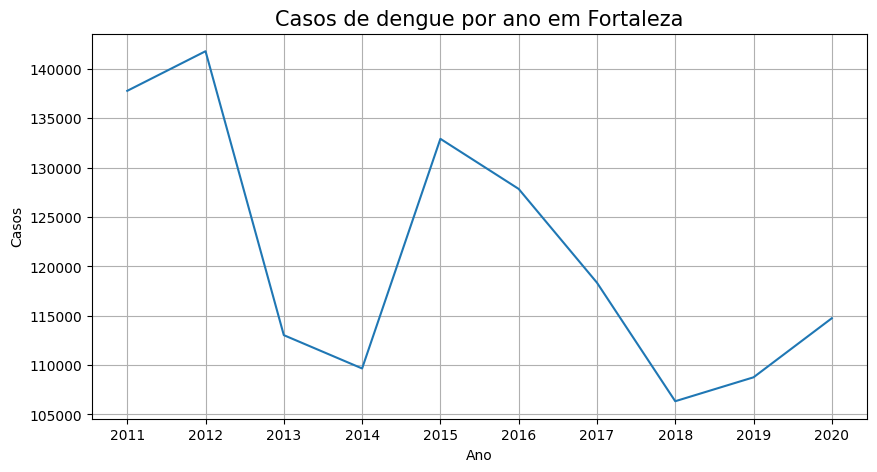

In [7]:
# Apresentando o gráfico
plt.figure(figsize=(10,5))
plt.plot(casos_ano_group)
plt.title('Casos de dengue por ano em Fortaleza',fontsize=15)
plt.xlabel('Ano')
plt.ylabel('Casos')
plt.xticks(casos_ano_group.index)
plt.grid()
plt.show()

b. Crie gráficos temporal apresentando algumas médias móveis para o número de casos de Dengue em Fortaleza.

In [8]:
# capturando todos os nomes dos bairros
nome_bairros = df.drop(['ANO','SEMANA_DO_ANO','DATA'],axis=1).columns

# Convertendo a coluna 'DATA' para o tipo datetime
df['DATA'] = pd.to_datetime(df['DATA'])

# Dado de Fortaleza
Fortaleza=pd.Series(df[nome_bairros].sum(axis=1).values,index=df['DATA'].values)

# Ordenar pela data
Fortaleza=Fortaleza.sort_index()

# Removendo valores nulos
Fortaleza=Fortaleza.dropna()

In [9]:
Fortaleza

2011-01-09    200.0
2011-01-16    296.0
2011-01-23    288.0
2011-01-30    297.0
2011-02-06    341.0
              ...  
2020-12-06     29.0
2020-12-13     26.0
2020-12-20     36.0
2020-12-27     21.0
2020-12-31     17.0
Length: 523, dtype: float64

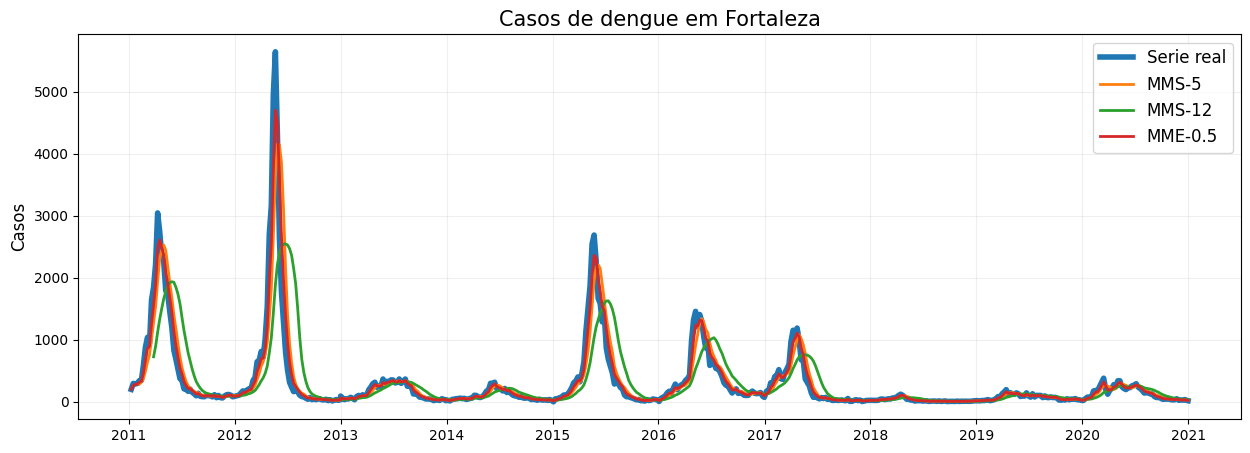

In [10]:
plt.figure(figsize=(15,5))
plt.plot(Fortaleza,lw=4,label='Serie real')
plt.plot(Fortaleza.rolling(5).mean(),label='MMS-5',lw=2)
plt.plot(Fortaleza.rolling(12).mean(),label='MMS-12',lw=2)
plt.plot(Fortaleza.ewm(alpha=0.5).mean(),label='MME-0.5',lw=2)
plt.ylabel('Casos',fontsize=12)
plt.grid(alpha=0.2)
plt.title('Casos de dengue em Fortaleza',fontsize=15)
plt.legend(fontsize=12)

c. O dado é estacionário?

In [11]:
testeestacionaria(Fortaleza)

'A serie NÃO é estacionaria'

d. O dado apresenta uma distribuição normal?

In [12]:
testenormal(Fortaleza)

'A serie NÃO é normal'

e. Escolha um periodo para treinar o algum modelo de ML e faça a predição de algumas semanas posteriores. Crie um gráfico demonstrando o predição. Qual é a melhor forma de dividir o dado? 

In [13]:
# Importando bibliotecas para modelagem preditiva
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

In [14]:
df_b = pd.DataFrame(Fortaleza, columns=['NR_CASOS']).copy()
df_b['DIAS']=np.arange(len(Fortaleza))
df_b

,NR_CASOS,DIAS
2011-01-09,200.0,0
2011-01-16,296.0,1
2011-01-23,288.0,2
2011-01-30,297.0,3
2011-02-06,341.0,4
...,...,...
2020-12-06,29.0,518
2020-12-13,26.0,519
2020-12-20,36.0,520
2020-12-27,21.0,521


In [15]:
# Separando apenas o periodo de 2011 a 2012
df_2011_2013 = df_b[(df_b.index >= '2011-01-01') & (df_b.index < '2013-02-01')].copy()
df_2011_2013

,NR_CASOS,DIAS
2011-01-09,200.0,0
2011-01-16,296.0,1
2011-01-23,288.0,2
2011-01-30,297.0,3
2011-02-06,341.0,4
...,...,...
2012-12-30,33.0,102
2012-12-31,92.0,103
2013-01-13,34.0,104
2013-01-20,48.0,105


In [16]:
X=df_2011_2013.dropna(axis=0)[['DIAS']].values
y=df_2011_2013.dropna(axis=0)[['NR_CASOS']].values
Xtrain=X[0:98]
ytrain=y[0:98]
Xtest=X[99:]
ytest=y[99:]
# Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,random_state=42,test_size=0.3)
modelo=XGBRegressor()
modelo.fit(Xtrain,ytrain)
print(mean_absolute_error(modelo.predict(Xtest),ytest) )

13.61926555633545


In [17]:
dferro=pd.DataFrame({'DATA':df_2011_2013.index[99:],'VALOR_REAL':ytest.reshape(1,-1)[0],'VALOR_PRED':modelo.predict(Xtest)})
dferro['ERRO']=abs(dferro['VALOR_PRED']-dferro['VALOR_REAL'])
dferro

,DATA,VALOR_REAL,VALOR_PRED,ERRO
0,2012-12-09,24.0,33.022938,9.022938
1,2012-12-16,36.0,33.022938,2.977062
2,2012-12-23,24.0,33.022938,9.022938
3,2012-12-30,33.0,33.022938,0.022938
4,2012-12-31,92.0,33.022938,58.977062
5,2013-01-13,34.0,33.022938,0.977062
6,2013-01-20,48.0,33.022938,14.977062
7,2013-01-27,46.0,33.022938,12.977062


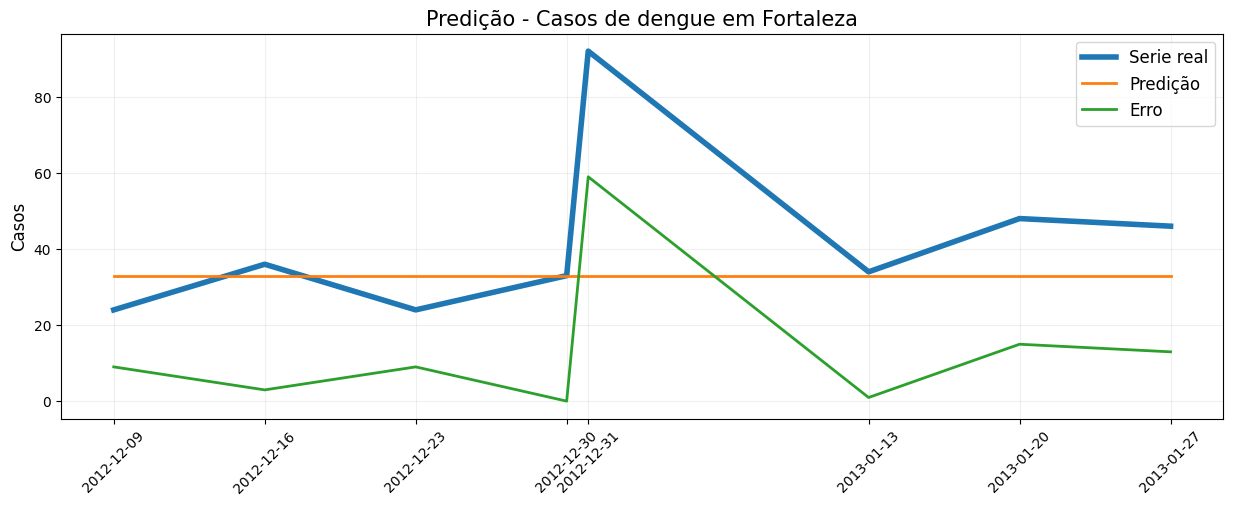

In [20]:
plt.figure(figsize=(15,5))
plt.plot(dferro['DATA'],dferro['VALOR_REAL'],lw=4,label='Serie real')
plt.plot(dferro['DATA'],dferro['VALOR_PRED'],label='Predição',lw=2)
plt.plot(dferro['DATA'],dferro['ERRO'],label='Erro',lw=2)
plt.ylabel('Casos',fontsize=12)
plt.grid(alpha=0.2)
plt.title('Predição - Casos de dengue em Fortaleza',fontsize=15)
plt.xticks(dferro['DATA'], rotation=45)
plt.legend(fontsize=12)
plt.show()

In [22]:
seriesfinal=df_2011_2013['NR_CASOS'].reset_index(drop=True).to_frame()

In [23]:
df_prev=pd.DataFrame()
nsplit=3
for i in range(nsplit+1):
    if i<nsplit:
        coluna=f'T_{i}'
        df_prev[coluna]=seriesfinal['NR_CASOS'].shift(-i).values
    if i==nsplit:
        coluna='TARGET'
        df_prev[coluna]=seriesfinal['NR_CASOS'].shift(-i).values

In [24]:
df_prev

,T_0,T_1,T_2,TARGET
0,200.0,296.0,288.0,297.0
1,296.0,288.0,297.0,341.0
2,288.0,297.0,341.0,346.0
3,297.0,341.0,346.0,589.0
4,341.0,346.0,589.0,883.0
...,...,...,...,...
102,33.0,92.0,34.0,48.0
103,92.0,34.0,48.0,46.0
104,34.0,48.0,46.0,NaN
105,48.0,46.0,NaN,NaN


In [28]:
# Verificar variação no nsplit
npredicao=120
seriesfinal=df_2011_2013['NR_CASOS'].reset_index(drop=True).to_frame()

for n in range(npredicao):

    df_prev=pd.DataFrame()
    nsplit=4
    for i in range(nsplit+1):
        if i<nsplit:
            coluna=f'T_{i}'
            df_prev[coluna]=seriesfinal['NR_CASOS'].shift(-i).values
        if i==nsplit:
            coluna='TARGET'
            df_prev[coluna]=seriesfinal['NR_CASOS'].shift(-i).values



    ultimalinha=list(df_prev.iloc[len(df_prev)-nsplit].values[0:nsplit])

    df_prev=df_prev.dropna(axis=0)
    X=df_prev.drop('TARGET',axis=1).values
    Y=df_prev[['TARGET']].values
    model=XGBRegressor()
    model.fit(X,Y)
    #fazendo predicao
    ultimalinha=ultimalinha+list(model.predict(np.array([ultimalinha])))

    daux=pd.DataFrame([ultimalinha],columns=df_prev.columns)
    df_prev=pd.concat([df_prev,daux],ignore_index=True)

    ultimalinha=list(df_prev.iloc[len(df_prev)-nsplit].values[0:nsplit])

    seriesfinal=pd.DataFrame(list(df_prev.drop('TARGET',axis=1).iloc[0].values)+list(df_prev['TARGET'].values),columns=['NR_CASOS'])

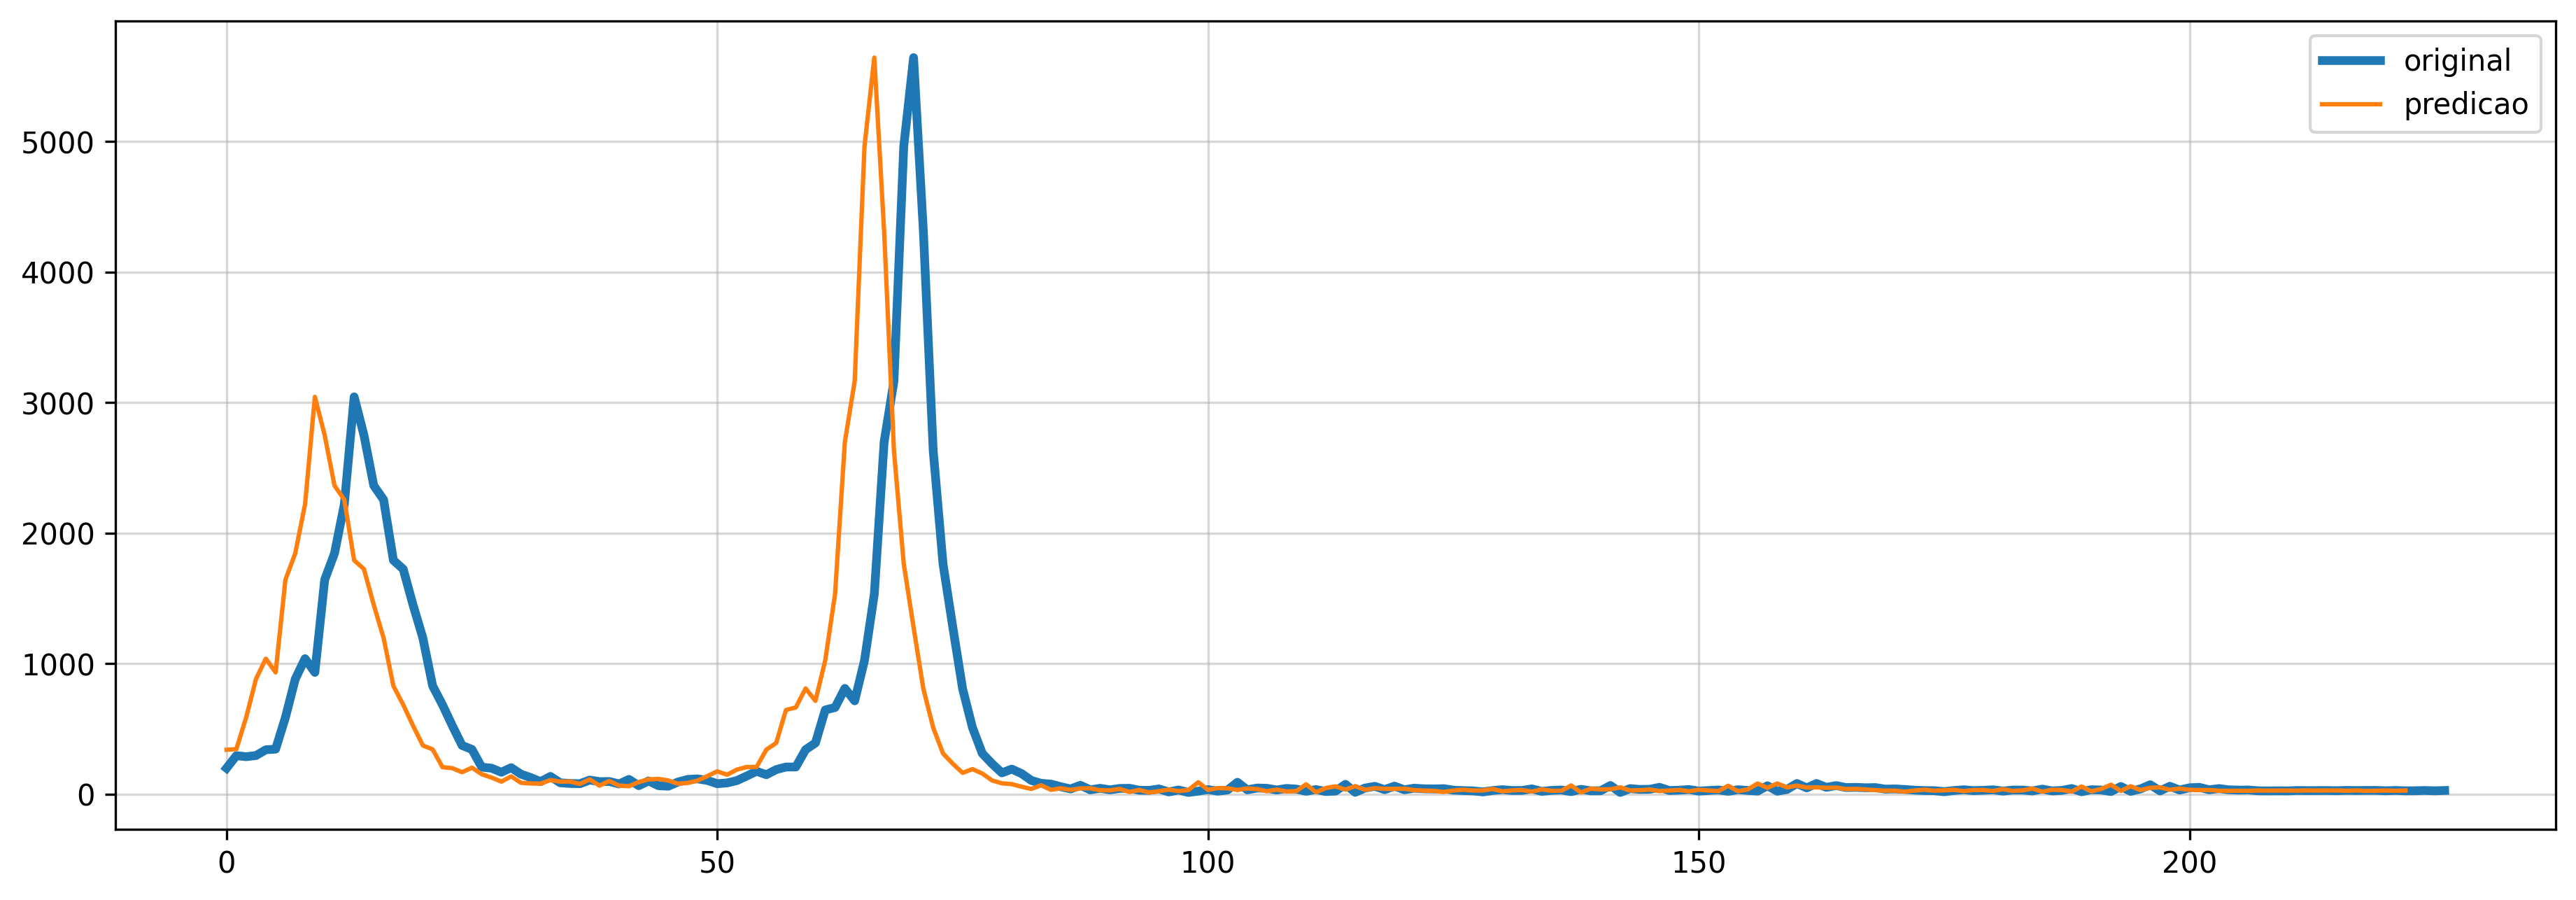

In [29]:
plt.figure(figsize=(15,5),dpi=300)
plt.plot(seriesfinal['NR_CASOS'].values, lw=3, label='original')
plt.plot(df_prev['TARGET'].values, label='predicao')
plt.legend()
plt.grid(alpha=0.5)

f. Para 2011, as séries temporais de casos de dengue entre bairros são semelhantes? Calcule a correlação entre os pares de bairros e verifique o valor médio.

In [ ]:
# Coletando o periodo de 2011
df_2011 = df[df['ANO'] == 2011].copy()

df_2011.drop(['ANO','DATA', 'SEMANA_DO_ANO'], axis=1, inplace=True)

df_sum = df_2011.sum()

# Retirar valores nulos
df_sum = df_sum[df_sum > 0]
df_sum = df_sum.dropna().reset_index()

In [63]:
df_2011.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, 0 to 51
Columns: 119 entries, AEROLANDIA to PAN-AMERICANO
dtypes: float64(4), int64(115)
memory usage: 48.8 KB


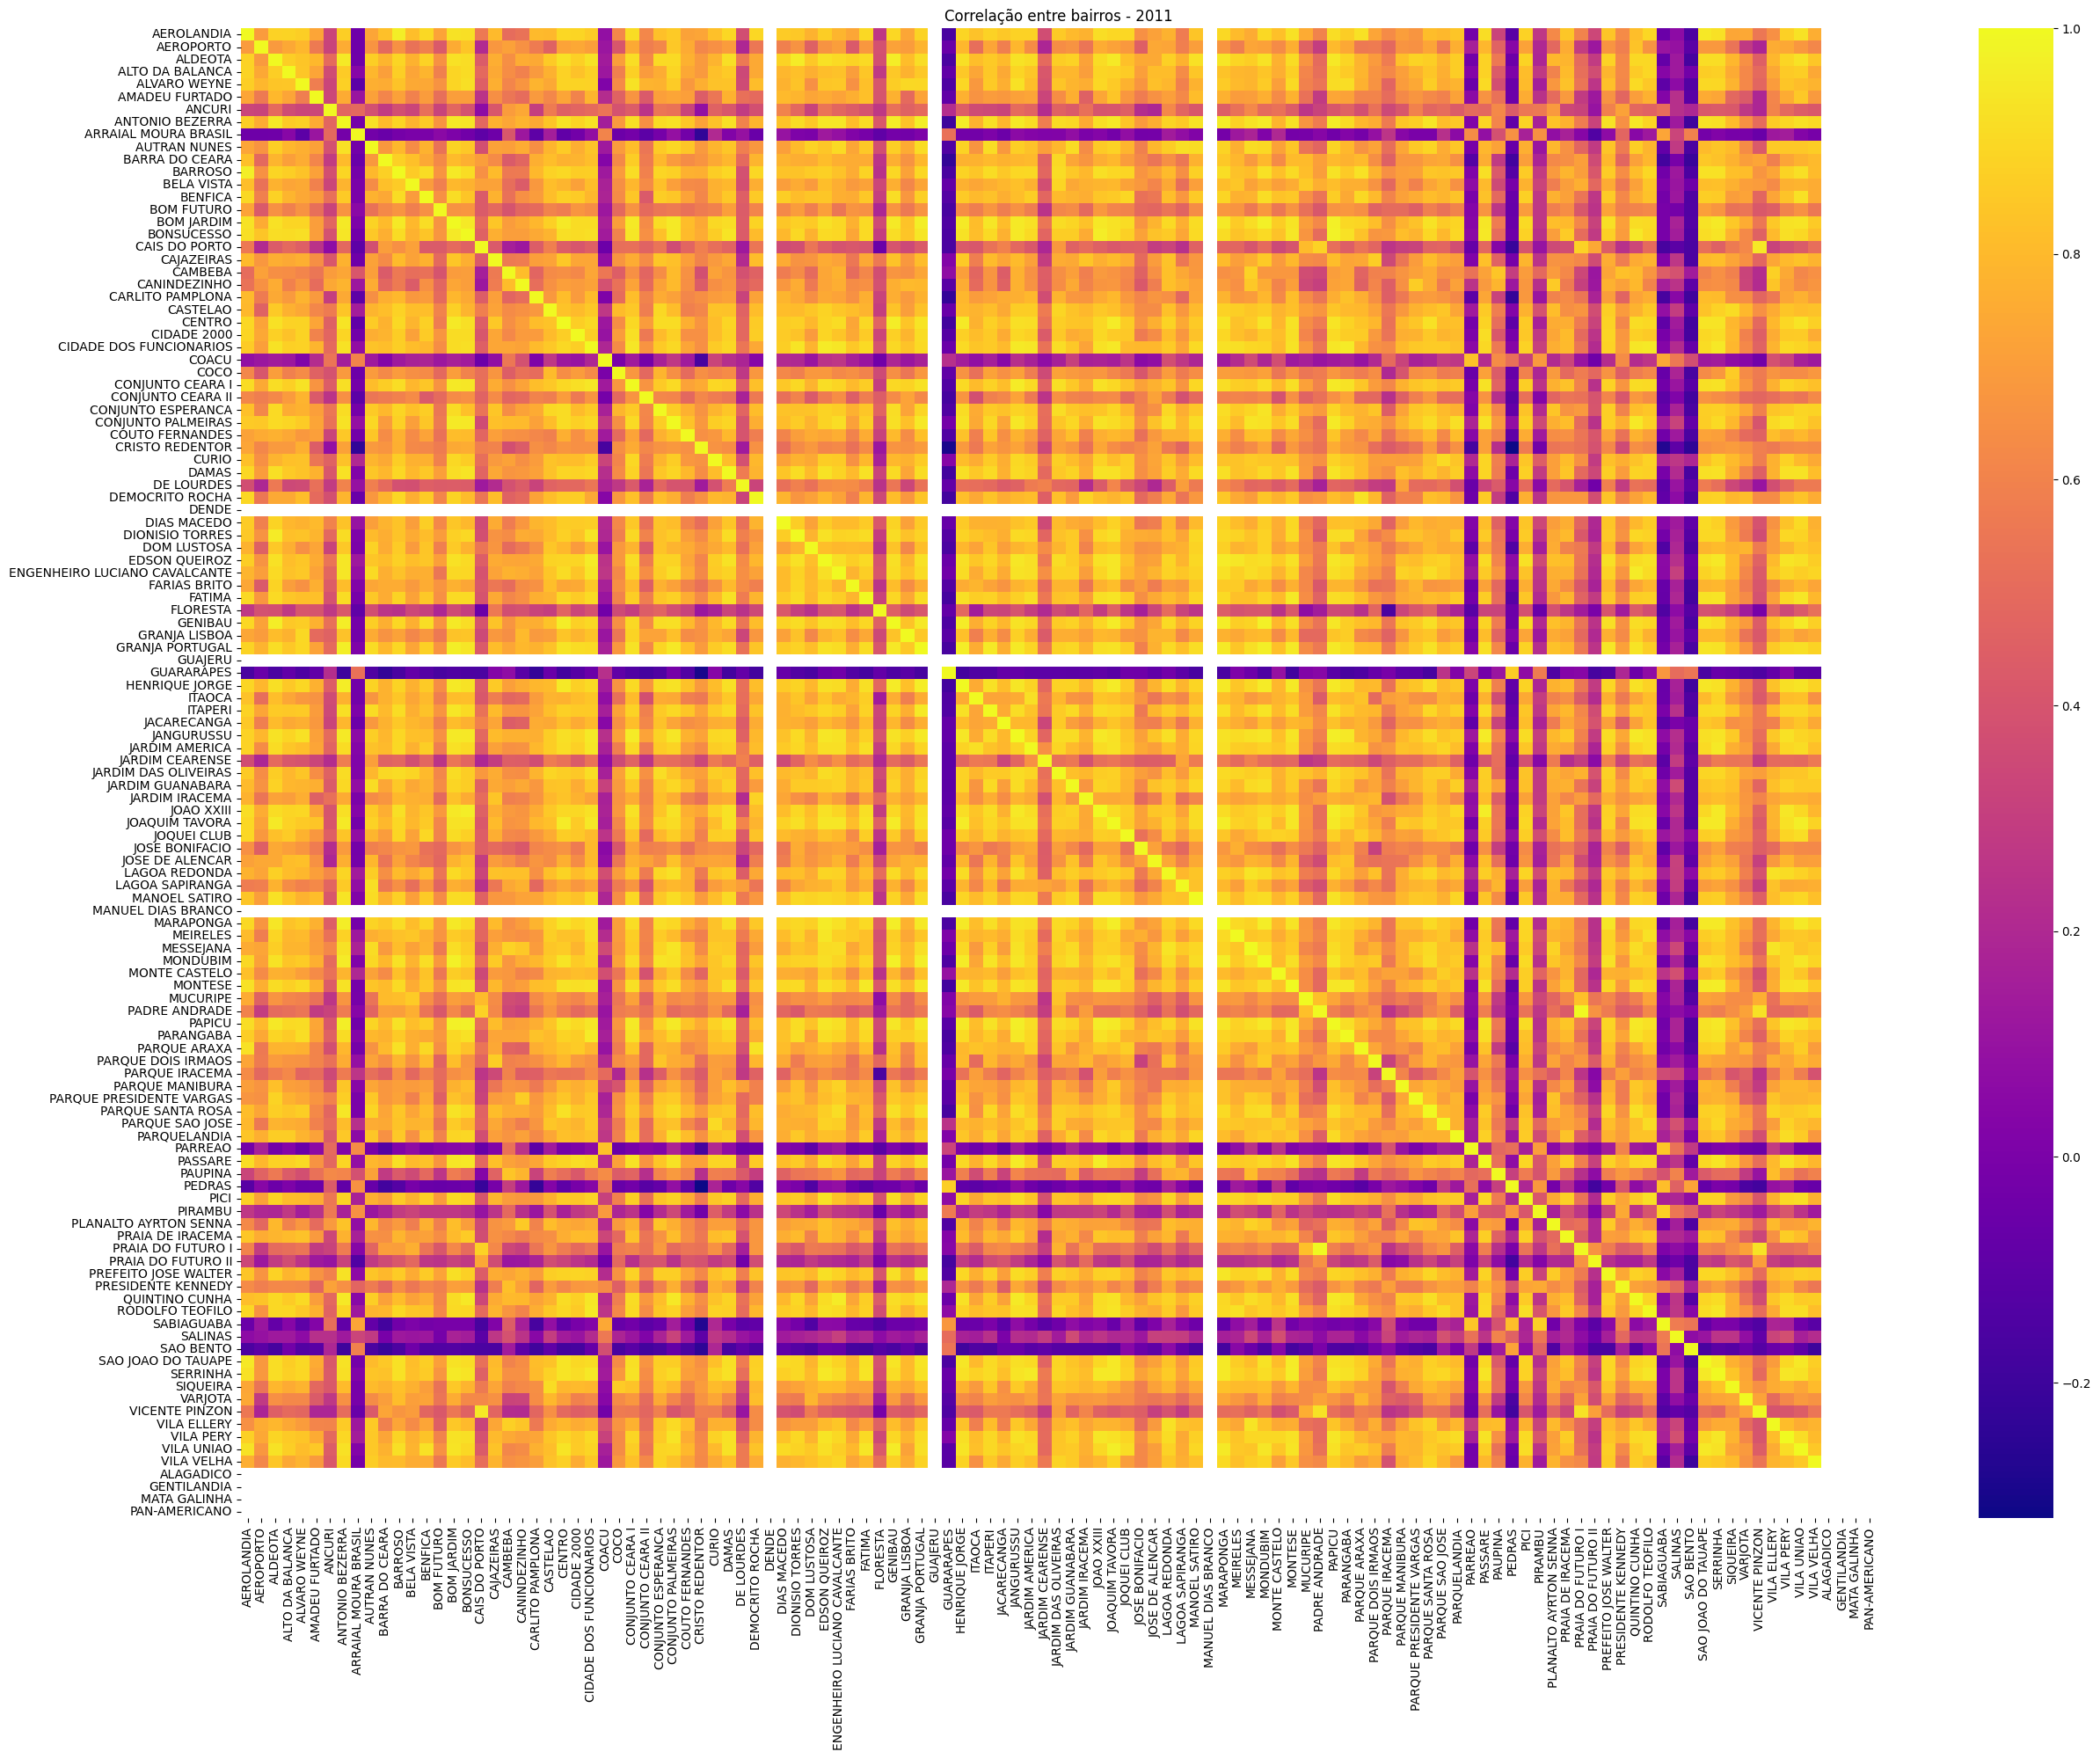

In [66]:
# Matrix de correlação entre os bairros
corr = df_2011.corr()
plt.figure(figsize=(30,22))
sns.heatmap(corr, annot=False, cmap='plasma')
plt.title("Correlação entre bairros - 2011")
plt.show()

In [62]:
# Matriz de correlação
corr = df_2011.corr()

# Transformar em formato "long" (pares de bairros)
corr_unstacked = corr.unstack()

# Remover duplicados e correlação de um bairro consigo mesmo
corr_unstacked = corr_unstacked.drop_duplicates()
corr_unstacked = corr_unstacked[corr_unstacked != 1]

# Top 10 maiores correlações positivas
top_pos = corr_unstacked.sort_values(ascending=False).head(10)

# Top 10 maiores correlações negativas
top_neg = corr_unstacked.sort_values().head(10)

print("Bairros mais correlacionados (positivos):")
print(top_pos)

print("\nBairros mais correlacionados (negativos):")
print(top_neg)


Bairros mais correlacionados (positivos):
BONSUCESSO       PAPICU             0.977308
BOM JARDIM       PAPICU             0.971302
GENIBAU          MONDUBIM           0.969683
BOM JARDIM       MONDUBIM           0.969256
JANGURUSSU       PAPICU             0.967725
ANTONIO BEZERRA  GRANJA PORTUGAL    0.967426
                 PAPICU             0.966896
BOM JARDIM       GRANJA PORTUGAL    0.966809
GRANJA PORTUGAL  MONDUBIM           0.965490
JOAQUIM TAVORA   VILA UNIAO         0.964794
dtype: float64

Bairros mais correlacionados (negativos):
CRISTO REDENTOR       PEDRAS            -0.320151
                      GUARARAPES        -0.299257
                      SABIAGUABA        -0.271206
                      SAO BENTO         -0.240161
ARRAIAL MOURA BRASIL  CRISTO REDENTOR   -0.237196
BARRA DO CEARA        GUARARAPES        -0.231260
CARLITO PAMPLONA      GUARARAPES        -0.227036
                      PEDRAS            -0.224360
CAIS DO PORTO         PEDRAS            -0.215633
